<a href="https://colab.research.google.com/github/frilham/frilham/blob/main/Tubes_AI_(Algoritma_Na%C3%AFve_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Pengantar Kecerdasan Buatan dan Sistem Cerdas
Assesment CLO-3

**Kelas IF-45-04**

**Kelompok 3**

**Ketua     :** Fathan Askar - 1301213374

**Anggota   :** 

Muhammad Ilham Hakim Somantri - 1301210330

Farhan Faturahman - 1301213188

Fajari Salim Hanri - 1301213299

Algoritma Learning yang digunakan yaitu **Algoritma kNN** dan **Algoritma Naïve Bayes**

Berikut adalah Google Colab **Algoritma Naïve Bayes**


# Dataset

In [ ]:
!pip install openpyxl
!pip install pandas
!pip install numpy
!pip install math
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def read_excel(path, sheet_target): # read excel data
    data = pd.read_excel(path, sheet_name=sheet_target)
    return pd.DataFrame(data)

In [ ]:
dwn_url = 'https://drive.google.com/uc?export=download&id=1JAETfbmhgCo2XpPP6C0yGG0M7N73W7BU'
data = read_excel(dwn_url,sheet_target="arrhythmia")
data

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


# Dataset Exploration dan Data Pre-Processing

In [ ]:
data.head()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 281 entries, No to Class
dtypes: float64(120), int64(156), object(5)
memory usage: 992.4+ KB


In [ ]:
data.columns.values

array(['No', 'age', 'sex', 'height', 'weight', 'qrsDur', 'prInterval',
       'qtInterval', 'tInterval', 'pInterval', 'QRS', 'T', 'P', 'QRST',
       'J', 'heartRate', 'ofChannelDI1', 'ofChannelDI2', 'ofChannelDI3',
       'ofChannelDI4', 'ofChannelDI5', 'ofChannelDI6', 'ofChannelDI7',
       'ofChannelDI8', 'ofChannelDI9', 'ofChannelDI10', 'ofChannelDI11',
       'ofChannelDI12', 'ofChannelDII1', 'ofChannelDII2', 'ofChannelDII3',
       'ofChannelDII4', 'ofChannelDII5', 'ofChannelDII6', 'ofChannelDII7',
       'ofChannelDII8', 'ofChannelDII9', 'ofChannelDII10',
       'ofChannelDII11', 'ofChannelDII12', 'ofChannelDIII1',
       'ofChannelDIII2', 'ofChannelDIII3', 'ofChannelDIII4',
       'ofChannelDIII5', 'ofChannelDIII6', 'ofChannelDIII7',
       'ofChannelDIII8', 'ofChannelDIII9', 'ofChannelDIII10',
       'ofChannelDIII11', 'ofChannelDIII12', 'ofChannelAVR1',
       'ofChannelAVR2', 'ofChannelAVR3', 'ofChannelAVR4', 'ofChannelAVR5',
       'ofChannelAVR6', 'ofChannelAVR7', 'ofChann

In [ ]:
data.Class.unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
data.Class.info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Class
Non-Null Count  Dtype
--------------  -----
452 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
data.describe()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,130.625419,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,1.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,113.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,226.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,339.250000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,452.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
data.shape

(452, 281)

<Axes: >

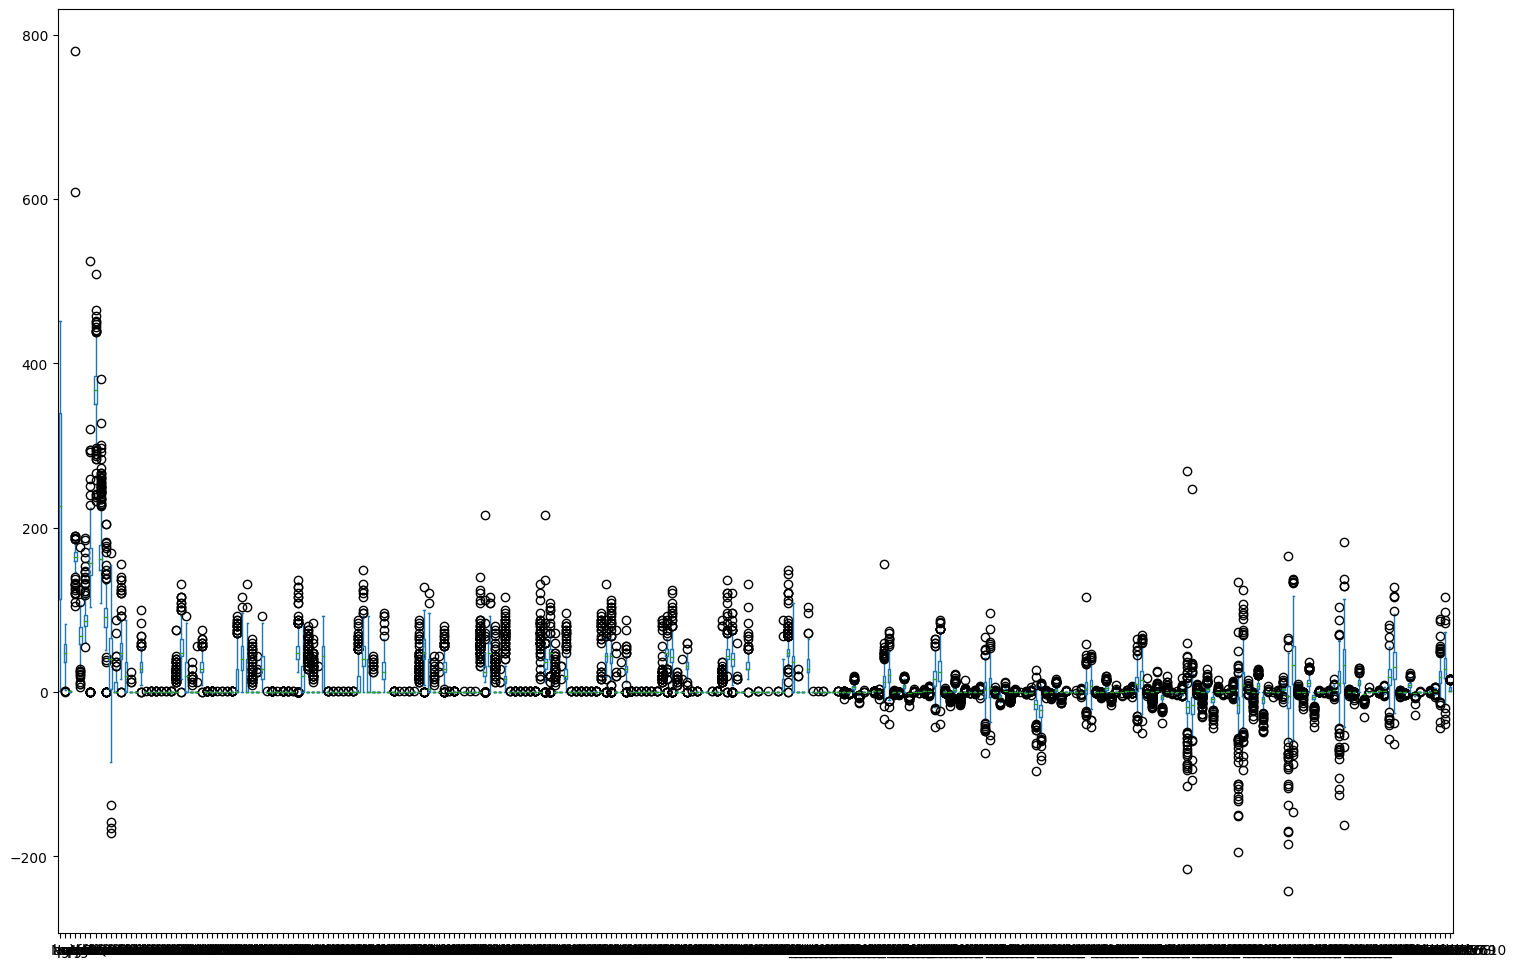

In [ ]:
#Ini merupakan boxplot dari datanya
#Kita bisa melihat bahwa banyak sekali data outlier pada data berikut, maka kami harus melakukan pembersihan data terdahulu
data.plot(kind='box',figsize = (18,12))

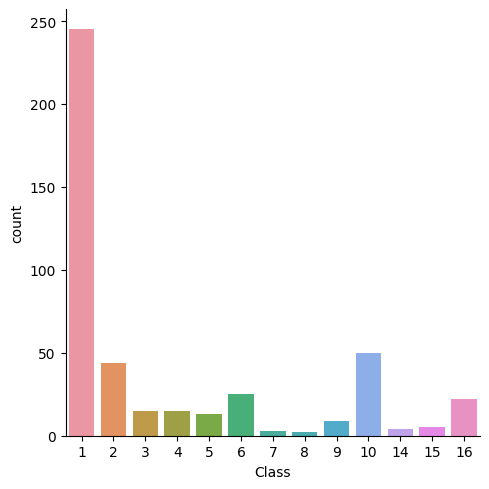

In [ ]:
#Melihat jumlah data setiap Class
#Dari sini kita bisa melihat bahwa jumalah data class 7, 8, 14, 15 sangat sedikit dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning 
#Dari sini kita bisa melihat bahwa jumalah data class 1 sangat banyak dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning naive bayes

sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
#drop row yang datanya kurang dari 5
data = data[data['Class'] != 7] 
data = data[data['Class'] != 8]
data = data[data['Class'] != 14]
data = data[data['Class'] != 15]

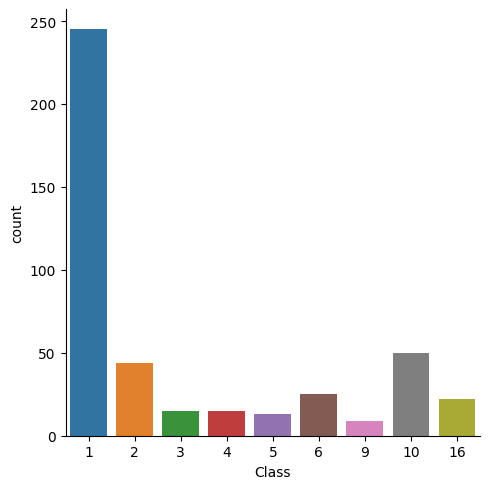

In [ ]:
#Melihat jumlah data setiap Class, setelah class yang kurang dari 5 di keluarkan 
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
count_missing_value = data.eq('?').sum()
index = 0
for column, count in count_missing_value.items(): 
  if count>0:
    print(column,':', count)

T : 8
P : 17
QRST : 1
J : 367


In [ ]:
data = data.drop('J',axis=1) #Data pada column J terlalu banyak yang missing valuenya ('?'), makanya di drop.

#Function untuk menggubah data yang '?' pada column lain yang tidak memiliki  missing value yang terlalu banyak menjadi rata-rata pada column tersebut.
def missing_val_into_mean(data, missing_marker='?'):
  for column in data.columns: #loop semua column pada data
    data[column] = data[column].replace(missing_marker,np.nan) #mengubah '?' menjadi nan
    data[column] = pd.to_numeric(data[column]) #convert data menjadi numeric pada column untuk mendapatkan mean column
    mean_value = data[column].mean() #mendapatkan nilai mean pada column
    data[column].fillna(mean_value, inplace = True) #mengisi data yang nan menjadi mean
  return data
data = missing_val_into_mean(data, missing_marker='?')
data
#print(data)

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,7,40,1,160,52,77,129,377,133,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,8,49,1,162,54,78,0,376,157,70,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
#ganti sex 0 jadi 2 biar gk ke drop di atas 30 persen 0nya
data['sex'] = data['sex'].replace(0, 2)

In [ ]:
data.sex

1      1
2      2
3      2
6      1
7      1
      ..
447    1
448    2
449    2
450    1
451    1
Name: sex, Length: 438, dtype: int64

In [ ]:
data

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,2,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,2,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,7,40,1,160,52,77,129,377,133,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,8,49,1,162,54,78,0,376,157,70,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,2,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,2,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Cleaning Data
# Mengedrop data frame yang memiliki missing value 0/0.0/.0 diatas 30% / 0.3
data = data.drop('No',axis=1) #Mengedrop column No karena ini berfungsi sebagai penomoran data saja


def drop_columns_with_high_zero_frequency(data, threshold=0.3):
    columns_to_drop = [] #inisialisasai list yang column perlu di drop
    tot = 0 #insiaisasi jumlah column yang di drop
    for column in data.columns: #loop semua column pada data
        zero_count = (data[column] == 0).sum() | (data[column] == '0.0').sum() | (data[column] == '.0').sum() #menjumlahkan nilai 0 atau 0.0 atau .0 pada column tersebut
        zero_frequency = zero_count / len(data) #mendapatkan frequency atau percentage dari 0 pada column tersebut
        if zero_frequency >= threshold: 
            tot+=1
            columns_to_drop.append(column) #nama column masuk pada list columns_to_drop agar nanti bisa di drop 

    data.drop(columns_to_drop, axis=1, inplace=True) #mengedrop semua column pada list columns_to_drop
    print(tot) #mengoutputkan jumlah column yang di drop
    return data

data = drop_columns_with_high_zero_frequency(data, threshold=0.3)
print(data)

159
     age  sex  height  weight  qrsDur  prInterval  qtInterval  tInterval  \
1     56    1     165      64      81         174         401        149   
2     54    2     172      95     138         163         386        185   
3     55    2     175      94     100         202         380        179   
6     40    1     160      52      77         129         377        133   
7     49    1     162      54      78           0         376        157   
..   ...  ...     ...     ...     ...         ...         ...        ...   
447   53    1     160      70      80         199         382        154   
448   37    2     190      85     100         137         361        201   
449   36    2     166      68     108         176         365        194   
450   32    1     155      55      93         106         386        218   
451   78    1     160      70      79         127         364        138   

     pInterval  QRS  ...  _2ofChannelV58  _2ofChannelV59  _2ofChannelV510  \
1     

In [ ]:
# data = data.sample(452).reset_index(drop=True) #untuk shuffle data biar gk terurut (gaperlu sih udah ga terurut dari sononya)
data

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,56,1,165,64,81,174,401,149,39,25,...,2.6,21.6,43.4,-0.5,8.5,0.2,2.1,20.4,38.8,6
2,54,2,172,95,138,163,386,185,102,96,...,3.4,11.5,48.2,0.9,9.5,0.3,3.4,12.3,49.0,10
3,55,2,175,94,100,202,380,179,143,28,...,3.0,36.8,68.0,0.1,12.2,0.4,2.6,34.6,61.6,1
6,40,1,160,52,77,129,377,133,77,77,...,1.3,9.3,18.9,-0.4,6.5,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.8,14.5,20.9,-0.3,8.2,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,1.0,-8.4,-0.6,0.0,4.3,0.7,0.6,-4.4,-0.5,1
448,37,2,190,85,100,137,361,201,73,86,...,3.7,50.7,82.5,-0.5,15.6,0.4,2.4,38.0,62.4,10
449,36,2,166,68,108,176,365,194,116,-85,...,-2.5,-39.6,-63.6,1.2,16.3,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,3.2,29.7,61.0,0.2,12.0,0.5,2.4,25.0,46.6,1


In [ ]:
#membuat Class menjadi 2 yaitu 0 untuk sakit arrhytmia, 1 untuk sehat
data['Class'] = data['Class'].apply(lambda x: 0 if x != 1 else x)

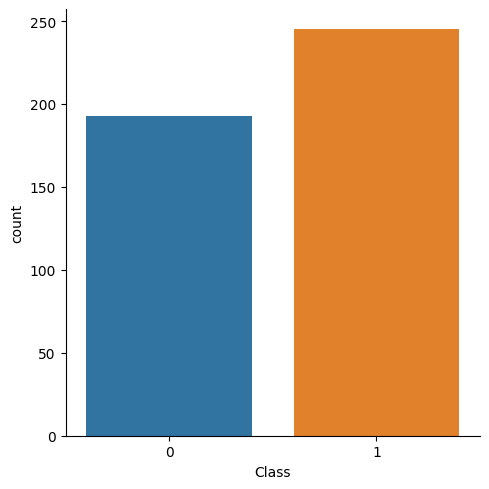

In [ ]:
#Melihat jumlah data setiap Class, setelah class menjadi 2
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
#membuat function untuk mendapatkan outlier2 pada data
def find_outliers(data, threshold=1.5):
    outliers = {}
    for column in data.columns:
        if data[column].dtype != 'object':
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (threshold * iqr)
            upper_bound = q3 + (threshold * iqr)
            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
            outliers[column] = column_outliers
    return outliers
outliers = find_outliers(data, threshold=1.5)
for column, values in outliers.items():
    print(f"Outliers in column {column}:")
    print(values)
    print()

Outliers in column age:
60     1
141    1
316    0
Name: age, dtype: int64

Outliers in column sex:
Series([], Name: sex, dtype: int64)

Outliers in column height:
60     110
113    132
126    186
141    780
198    133
210    124
297    130
316    608
320    105
332    188
346    186
379    120
403    127
423    186
424    119
429    130
430    138
432    140
448    190
Name: height, dtype: int64

Outliers in column weight:
60      10
126     18
141      6
210     25
213    176
254    124
308    110
316     10
320     12
379     28
403     22
424     21
429     24
430     29
Name: weight, dtype: int64

Outliers in column qrsDur:
2      138
85     163
88     170
89     137
189    153
207    146
293    132
297    131
312    123
370    146
379    118
388    188
395    147
403    185
424    140
426     55
427    133
430    123
Name: qrsDur, dtype: int64

Outliers in column prInterval:
7        0
20     251
48     228
56       0
64       0
71     294
95     292
106      0
108      0
110    

In [ ]:
def replace_outliers_with_mean(data, threshold=1.5):
    outliers = {}
    for column in data.columns:
        if data[column].dtype != 'object':
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (threshold * iqr)
            upper_bound = q3 + (threshold * iqr)
            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
            outliers[column] = column_outliers
            data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].mean()
    return data
data = replace_outliers_with_mean(data, threshold=1.5)

<Axes: >

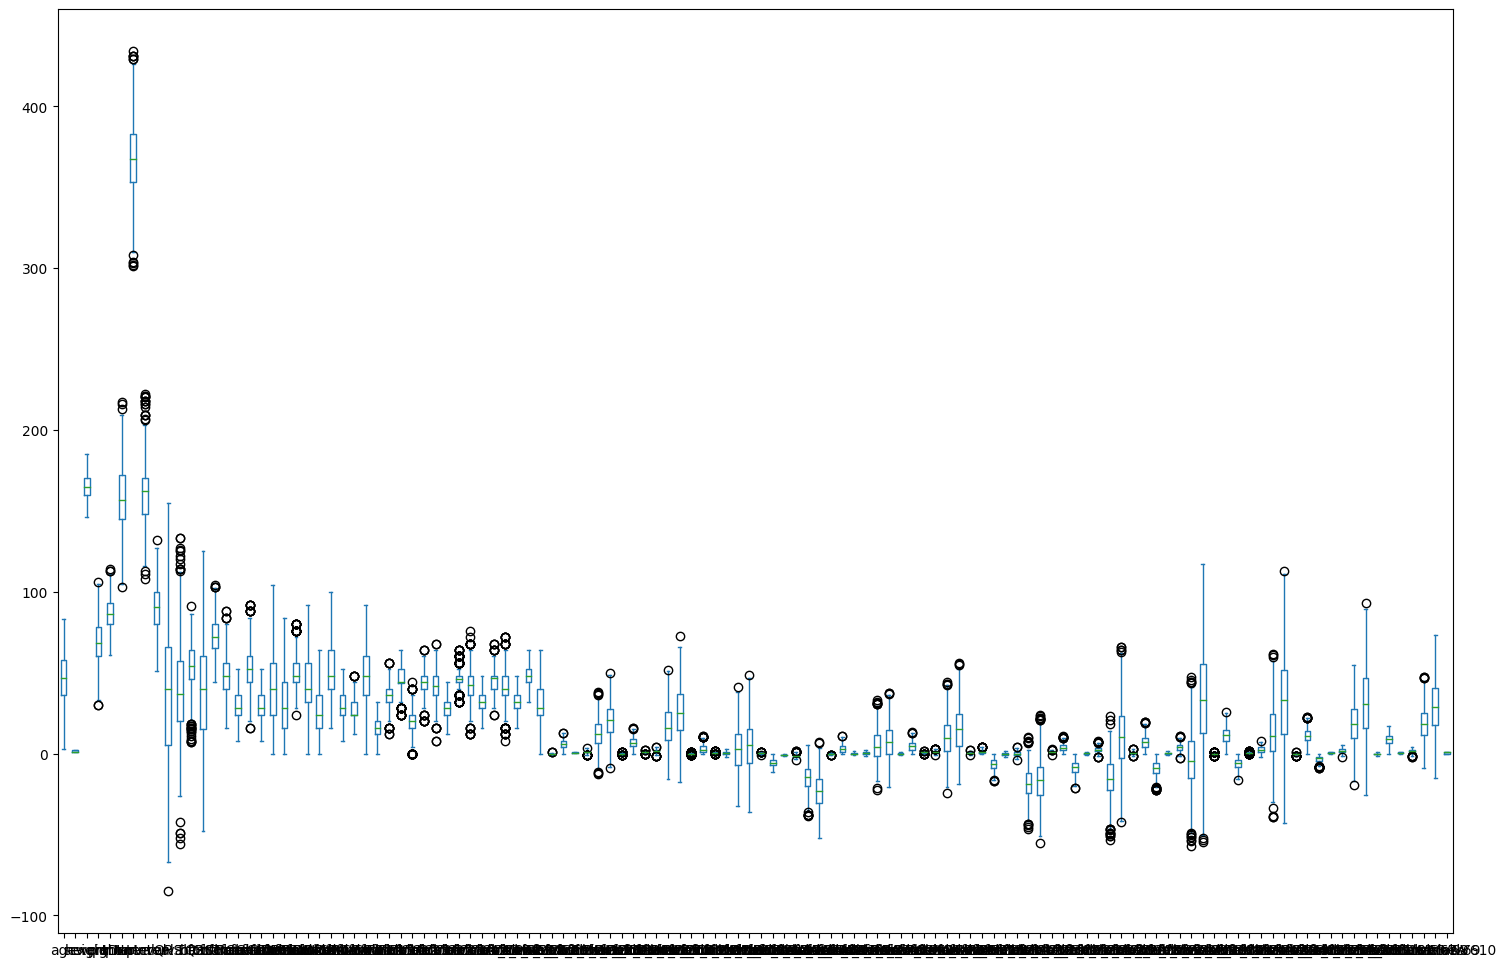

In [ ]:
data.plot(kind='box',figsize = (18,12))

### MULAI DISNI BEDA

In [ ]:
#Function untuk normalisasi data 
def normalize_data(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

y = data.Class
X = data.drop('Class',axis=1)

print(normalize_data(X))

        age  sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.6625  0.0  0.487179  0.447368  0.377358    0.622807    0.751880   
2    0.6375  1.0  0.666667  0.855263  0.523348    0.526316    0.639098   
3    0.6500  1.0  0.743590  0.842105  0.735849    0.868421    0.593985   
6    0.4625  0.0  0.358974  0.289474  0.301887    0.228070    0.571429   
7    0.5750  0.0  0.410256  0.315789  0.320755    0.469078    0.563910   
..      ...  ...       ...       ...       ...         ...         ...   
447  0.6250  0.0  0.358974  0.526316  0.358491    0.842105    0.609023   
448  0.4250  1.0  0.518148  0.723684  0.735849    0.298246    0.451128   
449  0.4125  1.0  0.512821  0.500000  0.886792    0.640351    0.481203   
450  0.3625  0.0  0.230769  0.328947  0.603774    0.026316    0.639098   
451  0.9375  0.0  0.358974  0.526316  0.339623    0.210526    0.473684   

     tInterval  pInterval       QRS  ...  _2ofChannelV57  _2ofChannelV58  \
1     0.359649   0.491882  0.458333

In [ ]:
#Function untuk standardisasi data 
def standardize_data(data):
    return (data - data.mean()) / data.std()
y = data.Class
X = data.drop('Class', axis=1)

standardized_X = standardize_data(X)
print(standardized_X)

          age       sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.587909 -0.890655  0.045263 -0.374599 -0.593350    0.742752    1.326521   
2    0.461522  1.120206  1.001993  1.977701  0.224648    0.231751    0.719456   
3    0.524716  1.120206  1.412020  1.901820  1.415319    2.043481    0.476630   
6   -0.423188 -0.890655 -0.638116 -1.285167 -1.016228   -1.347706    0.355217   
7    0.145554 -0.890655 -0.364764 -1.133406 -0.910508   -0.071371    0.314746   
..        ...       ...       ...       ...       ...         ...         ...   
447  0.398329 -0.890655 -0.638116  0.080685 -0.699069    1.904117    0.557572   
448 -0.612768  1.120206  0.210335  1.218895  1.415319   -0.976069   -0.292319   
449 -0.675962  1.120206  0.181939 -0.071077  2.261074    0.835661   -0.130435   
450 -0.928736 -0.890655 -1.321495 -1.057525  0.675283   -2.416162    0.719456   
451  1.978168 -0.890655 -0.638116  0.080685 -0.804789   -1.440615   -0.170906   

     tInterval  pInterval  

# Algoritma Naïve Bayes

In [ ]:
#split dataframe into training, testing, and truth dataframe
#train : test = 

dataTrain = data.loc[0:432]
dataTest = data.loc[432:]
dataTruth = data.loc[432:]

In [ ]:
dataTrain.info()
dataTrain

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 1 to 432
Columns: 120 entries, age to Class
dtypes: float64(119), int64(1)
memory usage: 396.1 KB


,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,56.0,1.0,165.000000,64.0000,81.000000,174.000000,401.0,149.000000,90.842466,25.0,...,2.600000,21.6,43.400000,-0.500000,8.500000,0.2,2.10000,20.4,38.800000,0.0
2,54.0,2.0,172.000000,95.0000,88.737443,163.000000,386.0,185.000000,102.000000,96.0,...,3.400000,11.5,48.200000,-0.296119,9.500000,0.3,3.40000,12.3,49.000000,0.0
3,55.0,2.0,175.000000,94.0000,100.000000,202.000000,380.0,179.000000,90.842466,28.0,...,3.000000,36.8,68.000000,0.100000,12.200000,0.4,2.60000,34.6,61.600000,1.0
6,40.0,1.0,160.000000,52.0000,77.000000,129.000000,377.0,133.000000,77.000000,77.0,...,1.300000,9.3,18.900000,-0.400000,6.500000,0.4,1.00000,14.3,20.500000,1.0
7,49.0,1.0,162.000000,54.0000,78.000000,156.474886,376.0,157.000000,70.000000,67.0,...,0.800000,14.5,20.900000,-0.300000,8.200000,0.1,0.50000,15.8,19.800000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,64.0,2.0,160.000000,63.0000,83.000000,156.474886,364.0,120.000000,90.000000,29.0,...,0.400000,20.2,22.900000,0.000000,6.700000,0.3,0.40000,23.7,26.400000,1.0
429,8.0,1.0,166.207763,68.1621,77.000000,125.000000,358.0,159.000000,70.000000,87.0,...,1.300000,32.9,45.900000,-0.300000,11.300000,0.7,3.60000,16.1,49.200000,0.0
430,11.0,2.0,166.207763,68.1621,88.737443,145.000000,361.0,221.000000,80.000000,112.0,...,1.800000,17.1,30.000000,-0.300000,8.994064,0.2,1.80000,12.2,25.100000,0.0
431,47.0,2.0,166.000000,56.0000,79.000000,145.000000,381.0,173.000000,101.000000,52.0,...,1.600000,30.3,42.100000,-0.600000,8.500000,0.6,1.20000,20.4,29.000000,0.0


In [ ]:
dataTest.info()
dataTest

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 432 to 451
Columns: 120 entries, age to Class
dtypes: float64(119), int64(1)
memory usage: 18.9 KB


,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
432,11.0,2.0,166.207763,42.0,88.0,123.0,362.000000,169.769406,81.0,-18.0,...,1.727169,18.40000,32.657991,0.100000,17.1,0.700000,1.23105,15.100000,29.494292,0.0
433,70.0,2.0,167.000000,60.0,80.0,149.0,367.625571,128.000000,93.0,-67.0,...,-0.500000,-13.80000,-16.100000,0.100000,2.7,0.300000,-0.20000,-7.100000,-8.300000,0.0
434,20.0,2.0,178.000000,65.0,88.0,155.0,360.000000,163.000000,71.0,-22.0,...,-1.300000,11.20000,1.100000,-0.200000,10.2,0.500000,0.40000,24.000000,25.400000,1.0
435,39.0,1.0,164.000000,62.0,79.0,155.0,367.000000,153.000000,95.0,50.0,...,1.500000,25.20000,37.500000,-0.100000,9.7,0.800000,1.30000,24.100000,33.700000,1.0
436,32.0,1.0,164.000000,57.0,77.0,144.0,340.000000,148.000000,82.0,27.0,...,3.100000,24.20000,49.600000,0.500000,9.9,0.500000,2.40000,19.100000,36.300000,1.0
437,35.0,1.0,155.000000,63.0,87.0,142.0,391.000000,137.000000,88.0,66.0,...,1.800000,19.80000,35.200000,-0.600000,10.7,1.000000,2.10000,25.600000,43.200000,1.0
438,37.0,2.0,175.000000,82.0,88.0,146.0,357.000000,179.000000,72.0,1.0,...,1.300000,33.40000,41.400000,-0.400000,13.5,0.500000,0.60000,30.100000,35.000000,1.0
439,49.0,1.0,168.000000,66.0,94.0,170.0,383.000000,152.000000,115.0,92.0,...,1.900000,17.80000,30.700000,-0.300000,8.2,0.800000,1.70000,21.500000,33.700000,1.0
440,37.0,2.0,176.000000,72.0,88.0,153.0,389.000000,172.000000,89.0,67.0,...,2.500000,30.80000,53.800000,-1.000000,16.6,0.700000,1.80000,24.900000,41.400000,1.0
441,37.0,1.0,160.000000,50.0,74.0,143.0,374.000000,146.000000,75.0,68.0,...,2.400000,54.50000,75.100000,0.000000,11.4,0.700000,1.80000,40.100000,55.500000,1.0


In [ ]:
dataTruth.info()
dataTruth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 432 to 451
Columns: 120 entries, age to Class
dtypes: float64(119), int64(1)
memory usage: 18.9 KB


,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
432,11.0,2.0,166.207763,42.0,88.0,123.0,362.000000,169.769406,81.0,-18.0,...,1.727169,18.40000,32.657991,0.100000,17.1,0.700000,1.23105,15.100000,29.494292,0.0
433,70.0,2.0,167.000000,60.0,80.0,149.0,367.625571,128.000000,93.0,-67.0,...,-0.500000,-13.80000,-16.100000,0.100000,2.7,0.300000,-0.20000,-7.100000,-8.300000,0.0
434,20.0,2.0,178.000000,65.0,88.0,155.0,360.000000,163.000000,71.0,-22.0,...,-1.300000,11.20000,1.100000,-0.200000,10.2,0.500000,0.40000,24.000000,25.400000,1.0
435,39.0,1.0,164.000000,62.0,79.0,155.0,367.000000,153.000000,95.0,50.0,...,1.500000,25.20000,37.500000,-0.100000,9.7,0.800000,1.30000,24.100000,33.700000,1.0
436,32.0,1.0,164.000000,57.0,77.0,144.0,340.000000,148.000000,82.0,27.0,...,3.100000,24.20000,49.600000,0.500000,9.9,0.500000,2.40000,19.100000,36.300000,1.0
437,35.0,1.0,155.000000,63.0,87.0,142.0,391.000000,137.000000,88.0,66.0,...,1.800000,19.80000,35.200000,-0.600000,10.7,1.000000,2.10000,25.600000,43.200000,1.0
438,37.0,2.0,175.000000,82.0,88.0,146.0,357.000000,179.000000,72.0,1.0,...,1.300000,33.40000,41.400000,-0.400000,13.5,0.500000,0.60000,30.100000,35.000000,1.0
439,49.0,1.0,168.000000,66.0,94.0,170.0,383.000000,152.000000,115.0,92.0,...,1.900000,17.80000,30.700000,-0.300000,8.2,0.800000,1.70000,21.500000,33.700000,1.0
440,37.0,2.0,176.000000,72.0,88.0,153.0,389.000000,172.000000,89.0,67.0,...,2.500000,30.80000,53.800000,-1.000000,16.6,0.700000,1.80000,24.900000,41.400000,1.0
441,37.0,1.0,160.000000,50.0,74.0,143.0,374.000000,146.000000,75.0,68.0,...,2.400000,54.50000,75.100000,0.000000,11.4,0.700000,1.80000,40.100000,55.500000,1.0


In [ ]:
dataTest['Class'] = '?'
dataTest
dataTrain_copy = dataTrain.drop('Class',axis = 1)

<ipython-input-34-b90c1799d8d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTest['Class'] = '?'


In [ ]:
def splitClass(dataTrain, columnTarget):
    truthData = []
    for truth in dataTrain[columnTarget].unique():
        truthData.append(dataTrain.where(dataTrain[columnTarget] == truth).dropna())
    return truthData

class_sick, class_normal = splitClass(dataTrain, columnTarget='Class')

print(class_normal)
print('==========================================')
print(class_sick)

      age  sex      height  weight      qrsDur  prInterval  qtInterval  \
3    55.0  2.0  175.000000    94.0  100.000000  202.000000       380.0   
6    40.0  1.0  160.000000    52.0   77.000000  129.000000       377.0   
7    49.0  1.0  162.000000    54.0   78.000000  156.474886       376.0   
8    44.0  2.0  168.000000    56.0   84.000000  118.000000       354.0   
11   45.0  1.0  165.000000    86.0   77.000000  143.000000       373.0   
..    ...  ...         ...     ...         ...         ...         ...   
422  29.0  1.0  162.000000    57.0   83.000000  164.000000       359.0   
423  51.0  2.0  166.207763    95.0   94.000000  203.000000       367.0   
425  36.0  2.0  171.000000    93.0   87.000000  150.000000       362.0   
426  35.0  1.0  160.000000    53.0   88.737443  163.000000       340.0   
428  64.0  2.0  160.000000    63.0   83.000000  156.474886       364.0   

     tInterval   pInterval   QRS  ...  _2ofChannelV58  _2ofChannelV59  \
3        179.0   90.842466  28.0  ... 

In [ ]:
def find_mean(class_sick, class_normal, columnTarget):
    sickMean = dict()
    normalMean = dict()
    for column in columnTarget:
        sickMean[column] = class_sick[column].mean()
        normalMean[column] = class_normal[column].mean()
    return sickMean, normalMean

sickMean, normalMean = find_mean(class_normal, class_sick, list(dataTrain_copy.columns.values))
print(f"Mean Result\n1 : {sickMean}\n0 : {normalMean}")

Mean Result
1 : {'age': 46.64782608695652, 'sex': 1.3478260869565217, 'height': 164.0287969029184, 'weight': 68.96227913440539, 'qrsDur': 84.42059757792337, 'prInterval': 157.22249354774667, 'qtInterval': 367.5032757593806, 'tInterval': 160.80268016676592, 'pInterval': 90.12153067301966, 'QRS': 36.37197736748064, 'T': 38.39798786653185, 'P': 53.30440979035422, 'QRST': 37.77370410904388, 'heartRate': 73.37391304347825, 'ofChannelDI2': 50.63966646813579, 'ofChannelDI6': 29.114314075838795, 'ofChannelDII2': 53.92757593805836, 'ofChannelDII6': 30.746079015286877, 'ofChannelDIII2': 40.12173913043478, 'ofChannelDIII6': 28.8, 'ofChannelAVR1': 51.326106809608895, 'ofChannelAVL2': 41.14782608695652, 'ofChannelAVL6': 24.380067500496324, 'ofChannelAVF2': 52.102441929720065, 'ofChannelAVF6': 28.54985110184634, 'ofChannelV12': 26.382608695652173, 'ofChannelV13': 45.82608695652174, 'ofChannelV16': 13.545364304149295, 'ofChannelV22': 34.73797895572762, 'ofChannelV23': 46.430732578916015, 'ofChannelV2

In [ ]:
def find_std(class_sick, class_normal, columnTarget):
    sickStd = dict()
    normalStd = dict()
    for column in columnTarget:
        sickStd[column] = class_sick[column].std()
        normalStd[column] = class_normal[column].std()

    return sickStd, normalStd

sickStd, normalStd = find_std(class_normal, class_sick, list(dataTrain_copy.columns.values))
print(f"Standard Deviation Result\n1 : {sickStd}\n0 : {normalStd}")

Standard Deviation Result
1 : {'age': 14.437105564742751, 'sex': 0.4773192657043803, 'height': 7.520693988102287, 'weight': 13.832130952703698, 'qrsDur': 8.681093201653031, 'prInterval': 21.82924992822965, 'qtInterval': 22.52045088436928, 'tInterval': 19.472347413016617, 'pInterval': 15.216749806328401, 'QRS': 34.65211730883315, 'T': 27.970472274518283, 'P': 15.260484382906535, 'QRST': 26.419220223109942, 'heartRate': 9.22069143611753, 'ofChannelDI2': 11.9018136434913, 'ofChannelDI6': 7.276096415953135, 'ofChannelDII2': 14.078289261241135, 'ofChannelDII6': 7.748933822215249, 'ofChannelDIII2': 22.39274205017189, 'ofChannelDIII6': 17.310521322930043, 'ofChannelAVR1': 10.8157485655755, 'ofChannelAVL2': 20.208625197458854, 'ofChannelAVL6': 12.98074523191387, 'ofChannelAVF2': 16.643376528827883, 'ofChannelAVF6': 9.327758245241238, 'ofChannelV12': 5.751145864478591, 'ofChannelV13': 21.213928385544033, 'ofChannelV16': 7.274672974336399, 'ofChannelV22': 7.875499626942468, 'ofChannelV23': 8.751

In [ ]:
def calculate_probability(mean, std, x) :
    #std +=1 ini buat apa?
    exponent = math.exp(-(((x)-(mean))**2) / (2*((std)**2)))
    return (1 / (math.sqrt(2*math.pi) * std)) * exponent

In [ ]:
def confussionMatrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    x = True

    for i in result:
        if(i['Ground Truth'] == '?'):
            x = False
            break
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] == i['Ground Truth'])):
            TP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] == i['Ground Truth'])):
            TN += 1
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] != i['Ground Truth'])):
            FP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] != i['Ground Truth'])):
            FN += 1
        
    if(x):
        print(f"\nTP : {TP} FP : {FP}\nTN : {TN} FN : {FN}")
        print(f"Accuracy : {((TP+TN)/(TP+TN+FP+FN))*100}%")
        print(f"Precission : {((TP)/(TP+FP))*100}%")
        print(f"Recall : {((TP)/(TP+FN))*100}%")
    else:
        print("\nCannot process the confussion matrix with unknown Ground Truth!")

In [ ]:
def doPrediction(normalMean, normalStd, sickMean, sickStd, target, columnTarget, truthColumn):
  result = []
  for i in range(len(target)):
     normalResult = 1
     sickResult = 1
     for column in columnTarget:
      normalResult *= calculate_probability(normalMean[column], normalStd[column], target[column].iloc[i])
      sickResult *= calculate_probability(sickMean[column], sickStd[column], target[column].iloc[i])
     if sickResult > normalResult:
      prediction = 0
     else:
      prediction = 1
     result.append({'ID' : i,
                    'Normal Probability' : "{}".format(normalResult),
                    'Sick Probability' : "{}".format(sickResult),
                    'Prediction Result' : prediction,
                    'Ground Truth' : target[truthColumn].iloc[i]})
  return result

In [ ]:
result = []
target = dataTest

result = doPrediction(sickMean, sickStd, normalMean, normalStd, target, list(dataTrain_copy.columns.values), truthColumn= 'Class')
for p in result:
  print(p)

{'ID': 0, 'Normal Probability': '2.6794344707676316e-149', 'Sick Probability': '4.936669872010799e-150', 'Prediction Result': 1, 'Ground Truth': '?'}
{'ID': 1, 'Normal Probability': '2.798775358384653e-179', 'Sick Probability': '4.4435338787245945e-163', 'Prediction Result': 0, 'Ground Truth': '?'}
{'ID': 2, 'Normal Probability': '1.8980523223424584e-153', 'Sick Probability': '3.4520229380345613e-152', 'Prediction Result': 0, 'Ground Truth': '?'}
{'ID': 3, 'Normal Probability': '1.0127492722022178e-131', 'Sick Probability': '8.63919649985329e-138', 'Prediction Result': 1, 'Ground Truth': '?'}
{'ID': 4, 'Normal Probability': '3.466451545580274e-138', 'Sick Probability': '1.7677036050560603e-145', 'Prediction Result': 1, 'Ground Truth': '?'}
{'ID': 5, 'Normal Probability': '8.262991169198071e-140', 'Sick Probability': '1.4025512860805375e-144', 'Prediction Result': 1, 'Ground Truth': '?'}
{'ID': 6, 'Normal Probability': '4.605701249212226e-133', 'Sick Probability': '7.813180290274993e-13

In [ ]:
def folding(dataset, trainingPercentage, location, shuffle:bool):
    lengthTraining = int(len(dataset)*trainingPercentage/100)
    # randomize the the data position
    if(shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    train = []
    validation = []
    if(location == 'left'):
        train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)
    elif(location == 'right'):
        validation,train = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)
    elif(location == 'middle'):
        train = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
        validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])
    return train, validation

In [ ]:
#FOLDING
trainData, validationData = folding(dataTrain.copy(), 70, 'left', shuffle=True)

In [ ]:
trainData

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,52.0,2.0,174.0,82.0,92.0,152.0,355.0,164.0,81.0,42.0,...,2.9,13.7,38.0,0.1,6.2,0.8,1.9,15.7,30.1,1.0
1,66.0,2.0,167.0,70.0,87.0,157.0,394.0,166.0,91.0,-11.0,...,2.9,23.4,43.7,-0.6,10.1,0.6,2.0,23.3,36.1,1.0
2,81.0,1.0,165.0,60.0,86.0,191.0,359.0,146.0,105.0,-11.0,...,1.8,9.0,24.4,0.1,4.0,0.4,1.1,8.6,16.3,1.0
3,61.0,2.0,185.0,95.0,95.0,197.0,340.0,139.0,132.0,39.0,...,2.2,30.3,41.7,-0.6,12.0,0.8,1.7,26.4,34.5,0.0
4,44.0,2.0,169.0,80.0,109.0,128.0,382.0,195.0,60.0,-34.0,...,2.0,5.4,22.2,-0.7,6.9,0.4,1.3,20.7,29.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,62.0,2.0,170.0,72.0,102.0,135.0,401.0,156.0,83.0,72.0,...,-0.3,6.1,3.7,-0.4,9.0,0.8,0.9,12.3,19.3,0.0
289,46.0,2.0,177.0,85.0,98.0,177.0,407.0,181.0,120.0,20.0,...,0.8,23.8,29.0,-0.7,10.8,0.8,1.6,17.6,30.0,1.0
290,35.0,1.0,160.0,67.0,84.0,155.0,324.0,178.0,100.0,-10.0,...,3.8,5.0,42.2,0.4,4.4,0.6,2.8,1.5,28.9,0.0
291,30.0,1.0,160.0,65.0,79.0,131.0,360.0,140.0,77.0,3.0,...,2.3,10.9,28.3,0.1,6.8,0.1,2.2,11.1,27.8,1.0


In [ ]:
validationData

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,15.0,1.0,163.0,38.0,84.000000,135.0,340.000000,169.769406,81.0,32.0,...,5.5,23.6,76.4,-0.300000,14.1,0.4,3.80000,24.000000,60.4,0.0
1,34.0,1.0,155.0,54.0,86.000000,127.0,369.000000,157.000000,78.0,23.0,...,1.9,19.2,34.4,-0.300000,8.6,0.7,1.80000,17.500000,31.9,1.0
2,51.0,1.0,160.0,83.0,96.000000,147.0,400.000000,169.769406,82.0,-37.0,...,-1.2,-5.5,-16.3,-0.700000,7.3,0.5,-1.10000,3.600000,-6.3,0.0
3,58.0,1.0,148.0,65.0,85.000000,140.0,431.000000,179.000000,94.0,71.0,...,0.3,-2.8,-0.2,-0.500000,9.7,0.5,0.40000,7.700000,11.2,1.0
4,75.0,1.0,159.0,59.0,88.737443,147.0,431.000000,169.769406,97.0,56.0,...,3.8,34.9,80.5,-0.296119,12.0,0.1,1.23105,19.258447,43.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,34.0,1.0,150.0,45.0,90.000000,135.0,354.000000,153.000000,70.0,55.0,...,1.9,12.1,25.7,-0.100000,7.0,0.4,1.40000,12.400000,21.0,1.0
122,30.0,2.0,181.0,78.0,98.000000,114.0,373.000000,156.000000,65.0,55.0,...,1.6,10.6,23.7,-0.800000,9.7,0.3,1.00000,20.500000,27.1,1.0
123,57.0,1.0,165.0,59.0,75.000000,157.0,406.000000,143.000000,92.0,4.0,...,1.2,16.2,28.4,0.700000,6.7,0.4,1.10000,18.400000,28.9,1.0
124,46.0,2.0,168.0,60.0,100.000000,185.0,413.000000,147.000000,93.0,-12.0,...,2.8,40.1,57.4,-0.400000,11.1,0.5,1.70000,22.500000,32.7,0.0


In [ ]:
sickDataTrain, normalDataTrain = splitClass(trainData, columnTarget='Class')

In [ ]:
sickDataTrain

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,52.0,2.0,174.0,82.0,92.0,152.0,355.0,164.0,81.0,42.0,...,2.9,13.7,38.0,0.1,6.2,0.8,1.9,15.7,30.1,1.0
1,66.0,2.0,167.0,70.0,87.0,157.0,394.0,166.0,91.0,-11.0,...,2.9,23.4,43.7,-0.6,10.1,0.6,2.0,23.3,36.1,1.0
2,81.0,1.0,165.0,60.0,86.0,191.0,359.0,146.0,105.0,-11.0,...,1.8,9.0,24.4,0.1,4.0,0.4,1.1,8.6,16.3,1.0
5,40.0,2.0,172.0,60.0,87.0,146.0,352.0,160.0,89.0,81.0,...,2.2,31.0,48.1,-0.1,11.3,0.8,1.3,38.4,47.7,1.0
7,36.0,2.0,170.0,85.0,84.0,139.0,363.0,184.0,82.0,2.0,...,2.7,16.2,39.4,-0.2,7.8,0.3,1.7,15.4,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,35.0,1.0,155.0,58.0,81.0,184.0,386.0,153.0,89.0,73.0,...,2.2,14.7,33.1,0.0,6.3,0.5,1.9,15.4,31.3,1.0
287,47.0,1.0,168.0,64.0,79.0,152.0,398.0,172.0,91.0,58.0,...,4.5,38.6,71.9,-0.8,13.9,0.8,3.2,30.3,53.9,1.0
289,46.0,2.0,177.0,85.0,98.0,177.0,407.0,181.0,120.0,20.0,...,0.8,23.8,29.0,-0.7,10.8,0.8,1.6,17.6,30.0,1.0
291,30.0,1.0,160.0,65.0,79.0,131.0,360.0,140.0,77.0,3.0,...,2.3,10.9,28.3,0.1,6.8,0.1,2.2,11.1,27.8,1.0


In [ ]:
normalDataTrain

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
3,61.0,2.0,185.0,95.0,95.0,197.000000,340.0,139.0,132.0,39.0,...,2.2,30.3,41.7,-0.6,12.0,0.8,1.7,26.4,34.5,0.0
4,44.0,2.0,169.0,80.0,109.0,128.000000,382.0,195.0,60.0,-34.0,...,2.0,5.4,22.2,-0.7,6.9,0.4,1.3,20.7,29.2,0.0
6,47.0,2.0,171.0,59.0,82.0,145.000000,347.0,169.0,61.0,77.0,...,2.8,25.3,47.1,-0.4,9.4,0.6,2.3,19.5,41.1,0.0
8,48.0,2.0,178.0,80.0,91.0,156.474886,331.0,159.0,122.0,60.0,...,0.5,12.2,14.6,-0.2,7.3,0.5,0.4,12.5,14.5,0.0
9,56.0,2.0,173.0,84.0,98.0,173.000000,372.0,161.0,86.0,72.0,...,4.0,28.8,57.6,-0.1,10.9,0.5,2.7,23.0,48.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,36.0,1.0,160.0,65.0,72.0,142.000000,371.0,137.0,91.0,56.0,...,1.3,28.5,37.0,0.0,7.1,0.4,0.9,25.5,30.9,0.0
279,65.0,1.0,155.0,68.0,68.0,200.000000,347.0,164.0,111.0,-32.0,...,0.3,-3.9,0.0,-0.1,3.3,0.7,0.3,4.1,8.0,0.0
284,69.0,2.0,176.0,75.0,82.0,145.000000,357.0,129.0,101.0,49.0,...,1.0,8.0,14.6,0.1,6.8,0.9,0.8,11.8,16.2,0.0
288,62.0,2.0,170.0,72.0,102.0,135.000000,401.0,156.0,83.0,72.0,...,-0.3,6.1,3.7,-0.4,9.0,0.8,0.9,12.3,19.3,0.0


In [ ]:
sickDataTrain_mean, normalDataTrain_mean = find_mean(sickDataTrain,normalDataTrain,list(dataTrain_copy.columns.values))

sickDataTrain_std, normalDataTrain_std = find_std(sickDataTrain,normalDataTrain,list(dataTrain_copy.columns.values))

result = []
target = validationData
result = doPrediction(sickDataTrain_mean, sickDataTrain_std, normalDataTrain_mean, normalDataTrain_std, target, list(dataTrain_copy.columns.values), truthColumn= 'Class')

for p in result:
  print(p)

confussionMatrix(result)

{'ID': 0, 'Normal Probability': '1.2091390598095826e-150', 'Sick Probability': '4.5541067929805146e-156', 'Prediction Result': 1, 'Ground Truth': 0.0}
{'ID': 1, 'Normal Probability': '2.4257959624621e-130', 'Sick Probability': '1.959507738234848e-136', 'Prediction Result': 1, 'Ground Truth': 1.0}
{'ID': 2, 'Normal Probability': '7.612678821274657e-170', 'Sick Probability': '4.437664882088674e-158', 'Prediction Result': 0, 'Ground Truth': 0.0}
{'ID': 3, 'Normal Probability': '1.5480273466603383e-153', 'Sick Probability': '2.6374150926617496e-145', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'ID': 4, 'Normal Probability': '1.2513152138876547e-158', 'Sick Probability': '2.1207144917343844e-152', 'Prediction Result': 0, 'Ground Truth': 0.0}
{'ID': 5, 'Normal Probability': '3.142458868112622e-133', 'Sick Probability': '5.839976226270366e-142', 'Prediction Result': 1, 'Ground Truth': 0.0}
{'ID': 6, 'Normal Probability': '4.556534754593982e-143', 'Sick Probability': '1.0405901762659311e-144